<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-PCVK-2023/blob/main/week-07/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kelompok 2 :
| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## **Konvulasi tanpa Library**

**Membuat fungsi konvulasi**

Fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambakan pada citra

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

Load citra yang akan diproses dan ubah menjadi citra keabuan

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

Filter Average


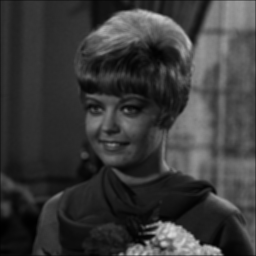


Filter Low Pass


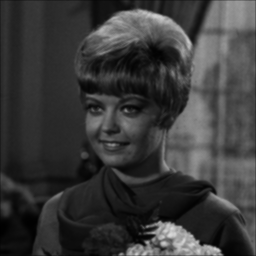


Filter High Pass


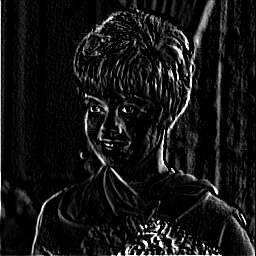

In [41]:
# Filter Average
kernel_average = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]]) / 9.0
result_average = convolution2d(img_gray, kernel_average, stride=1, padding=1)

# Filter Low Pass
kernel_low_pass = np.array([[1, 1, 1],
                            [1, 4, 1],
                            [1, 1, 1]]) / 12.0
result_low_pass = convolution2d(img_gray, kernel_low_pass, stride=1, padding=1)

# Filter High Pass
kernel_high_pass = np.array([[-1, 0, 1],
                             [-1, 0, 3],
                             [-3, 0, 1]])
result_high_pass = convolution2d(img_gray, kernel_high_pass, stride=1, padding=1)

print("Filter Average")
cv2_imshow(result_average)

print("\nFilter Low Pass")
cv2_imshow(result_low_pass)

print("\nFilter High Pass")
cv2_imshow(result_high_pass)

**a. Sharpen**

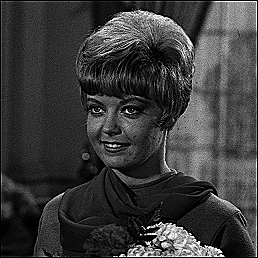

In [ ]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

**b. Emboss**

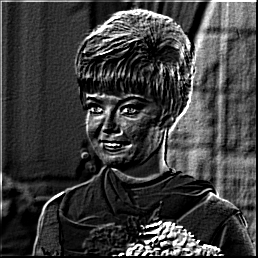

In [ ]:
kernel_embos = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

**c. Left Sobel Edge Detection**

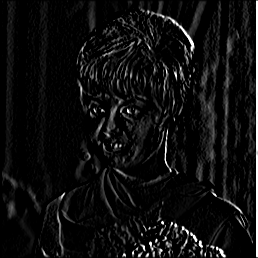

In [ ]:
kernel_sobel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

**d. Canny Edge Detection**

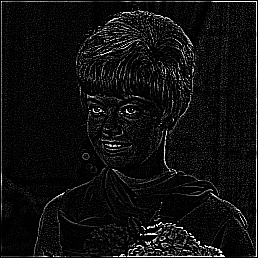

In [ ]:
kernel_edge = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

**e. Prewitt Edge Detection**

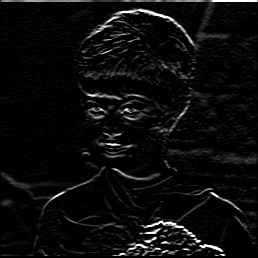

In [ ]:
kernel_edge = np.array([[-1, -1, -1],
                        [0, 0, 0],
                        [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

**f. 5x5 Gaussian Blur**

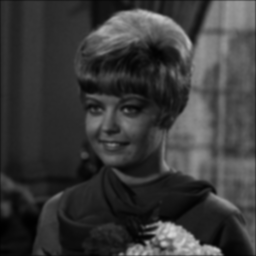

In [ ]:
# Kernel Gaussian Blur 5x5
kernel_gaussian_blur = (1/256) * np.array([[1, 4, 6, 4, 1],
                                           [4, 16, 24, 16, 4],
                                           [6, 24, 36, 24, 6],
                                           [4, 16, 24, 16, 4],
                                           [1, 4, 6, 4, 1]])

cv2_imshow(convolution2d(img_gray, kernel_gaussian_blur, 1, 2))

**g. 21x21 Gaussian Blur**

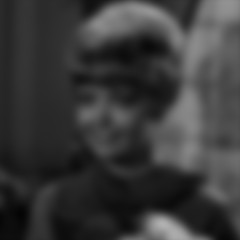

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# **Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

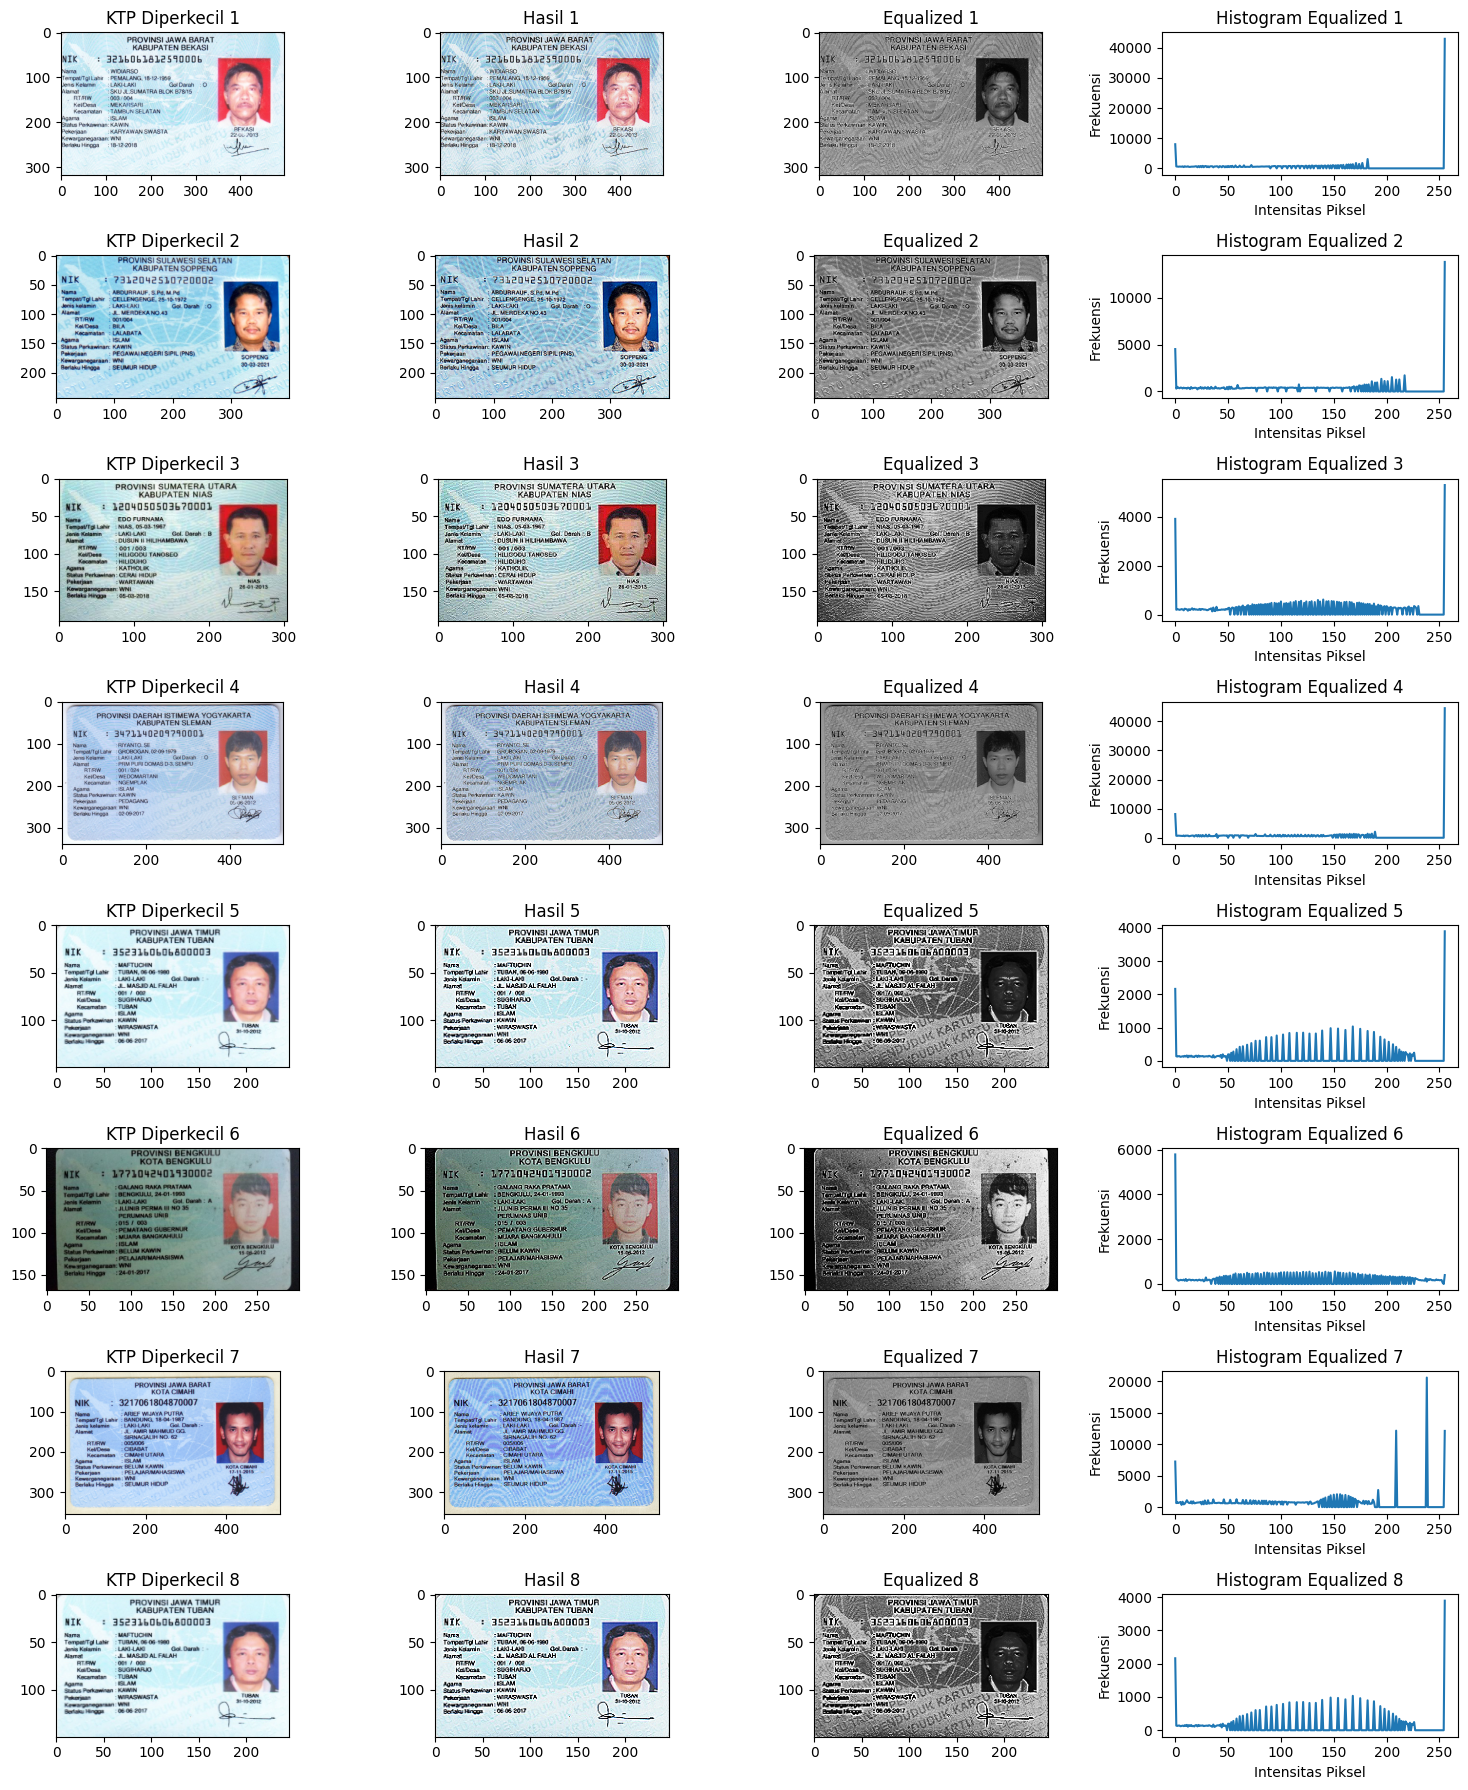

In [31]:
import os

folder_path = '/content/drive/MyDrive/PCVK/KTP/'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
    result_equalized = cv.equalizeHist(result_gray)
    result_equalized_color = cv.cvtColor(result_equalized, cv.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv.cvtColor(result_equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()